In [ ]:
"""
 Exploratory Scratch Work
This notebook contains rough EDA used to understand the dataset.  
Final analysis and polished reporting are in the `sensor_N.ipynb` notebooks and the summary slides.  
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read parquet
df_occ = pd.read_parquet("data/occupancy.parquet")
df_ts = pd.read_parquet("data/timeseries.parquet")

In [2]:
def extract_time_str(col, fmt="%H:%M:%S"):
    col = pd.to_datetime(col)       # ensure datetime dtype
    return col.dt.strftime(fmt)

In [3]:
# General look at data frame so see what we are working with
df_ts

,building_id,building_name,device_id,device_name,field,kind,date_time_local,value
0,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-14 17:22:01.319,Occupied
1,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,zone_air_temperature_sensor,Number,2023-03-14 17:22:01.319,23.899999618530273
2,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,effective_cooling_zone_air_temperature_setpoint,Number,2023-03-14 17:22:01.319,24.0
3,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-14 18:00:58.790,Unoccupied
4,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,effective_cooling_zone_air_temperature_setpoint,Number,2023-03-14 18:03:29.018,29.0
...,...,...,...,...,...,...,...,...
316,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,zone_air_temperature_sensor,Number,2023-03-15 15:23:51.955,23.600000381469727
317,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,effective_cooling_zone_air_temperature_setpoint,Number,2023-03-15 15:23:51.955,0.0
318,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,zone_air_temperature_sensor,Number,2023-03-15 16:23:57.086,23.600000381469727
319,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,occupied_mode,Bool,2023-03-15 16:23:57.086,Occupied


In [4]:
# Listing all the unique sensors
sensors = df_ts["device_name"].unique()
print(sensors)

['FC_23_29' 'FC_23_6' 'FC_6_30' 'FC_L_3_1']


In [27]:
### Extracting data from first sensor only
df_device0 = df_ts[df_ts["device_name"] == sensors[0]]
df_device0_bool = df_device0[df_device0["kind"] == "Bool"]
df_device0_bool

,building_id,building_name,device_id,device_name,field,kind,date_time_local,value
0,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-14 17:22:01.319,Occupied
3,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-14 18:00:58.790,Unoccupied
6,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-14 18:22:33.645,Unoccupied
9,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-14 19:22:41.648,Unoccupied
11,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-14 20:22:49.743,Unoccupied
15,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-14 21:22:54.792,Unoccupied
18,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-14 22:22:56.030,Unoccupied
20,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-14 23:23:04.513,Unoccupied
23,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-15 00:23:05.595,Unoccupied
26,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e21655320,FC_23_29,occupied_mode,Bool,2023-03-15 01:13:34.963,None


This sensor registers the building as empty after work hours, and turned on during work hours.
Our data set starts at the end of the day, so let's just focus on the point where the building is unoccupied.

In [6]:
### Collecting Nights
df_device0_night = df_device0.iloc[3:46].reset_index(drop=True)
#df_device0_night

# Missing values
df_device0_night.at[23, "value"] = "Unoccupied"  
avg = (23.5+23.399999618530273) / 2                # Use the average from the two adjacent measurements
df_device0_night.at[24, "value"] = avg
df_device0_night.at[25, "value"] = 29.0

#df_device0_night

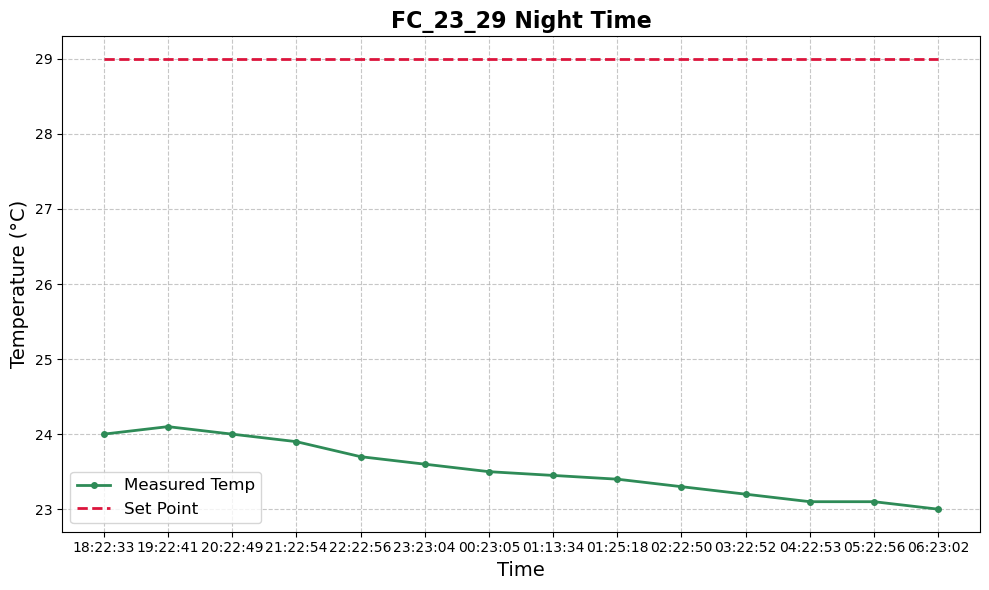

In [7]:
set_points0_night = df_device0_night[df_device0_night["field"] == "effective_cooling_zone_air_temperature_setpoint"]
y_set = np.array(set_points0_night["value"]).astype(float)
x_set = np.arange(y_set.size)

temps0_night = df_device0_night[df_device0_night["field"] == "zone_air_temperature_sensor"]
y_temp = np.array(temps0_night["value"]).astype(float)
x_temp = np.arange(y_temp.size)
x = extract_time_str(temps0_night["date_time_local"])

plt.figure(figsize=(10,6))  # bigger, clearer figure

# Plot measured temps
plt.plot(x, y_temp, 
         color='seagreen', linewidth=2, marker='o', markersize=4, 
         label="Measured Temp")

# Plot set point
plt.plot(x, np.ones(x_temp.size)*29, 
         color="crimson", linewidth=2, linestyle="--", 
         label="Set Point")

# Titles and labels
plt.title("FC_23_29 Night Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=12, loc="best")

# Tighter layout
plt.tight_layout()
plt.show()

In [8]:
#df_device0_day

Checking Day

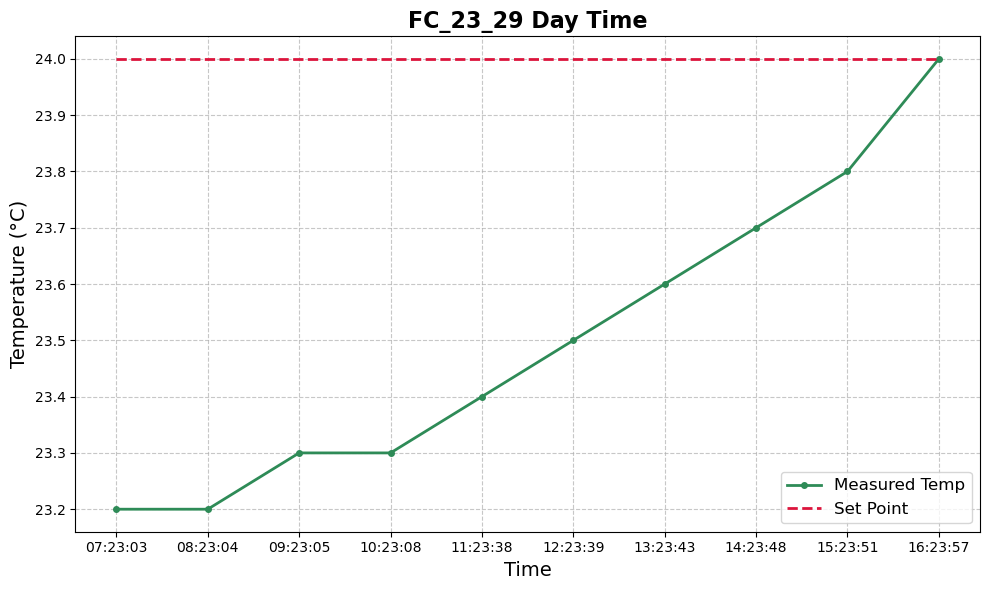

In [9]:
df_device0_day = df_device0.iloc[48:79]
#df_device0_day

set_points0_day = df_device0_day[df_device0_day["field"] == "effective_cooling_zone_air_temperature_setpoint"]
y_set = np.array(set_points0_day["value"]).astype(float)
x_set = np.arange(y_set.size)

temps0_day = df_device0_day[df_device0_day["field"] == "zone_air_temperature_sensor"]
y_temp = np.array(temps0_day["value"]).astype(float)
x_temp = np.arange(y_temp.size)
x = extract_time_str(temps0_day["date_time_local"])

plt.figure(figsize=(10,6))  # bigger, clearer figure

# Plot measured temps
plt.plot(x, y_temp, 
         color='seagreen', linewidth=2, marker='o', markersize=4, 
         label="Measured Temp")

# Plot set point
plt.plot(x, np.ones(x_temp.size)*24, 
         color="crimson", linewidth=2, linestyle="--", 
         label="Set Point")

# Titles and labels
plt.title("FC_23_29 Day Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=12, loc="best")

# Tighter layout
plt.tight_layout()
plt.show()

In [26]:
df_device1 = df_ts[df_ts["device_name"] == sensors[1]].reset_index(drop=True)
df_device1_bool = df_device1[df_device1["kind"] == "Bool"]
df_device1_bool

,building_id,building_name,device_id,device_name,field,kind,date_time_local,value
1,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e216553af,FC_23_6,occupied_mode,Bool,2023-03-14 17:22:01.319,Occupied
3,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e216553af,FC_23_6,occupied_mode,Bool,2023-03-14 18:00:28.863,Unoccupied
7,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e216553af,FC_23_6,occupied_mode,Bool,2023-03-14 18:22:33.645,Unoccupied
10,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e216553af,FC_23_6,occupied_mode,Bool,2023-03-14 19:22:41.648,Unoccupied
13,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e216553af,FC_23_6,occupied_mode,Bool,2023-03-14 20:22:49.744,Unoccupied
16,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e216553af,FC_23_6,occupied_mode,Bool,2023-03-14 21:22:54.792,Unoccupied
19,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e216553af,FC_23_6,occupied_mode,Bool,2023-03-14 22:22:56.030,Unoccupied
21,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e216553af,FC_23_6,occupied_mode,Bool,2023-03-14 23:23:04.513,Unoccupied
24,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e216553af,FC_23_6,occupied_mode,Bool,2023-03-15 00:23:05.595,Unoccupied
27,60b517bd5f7ee717b4903f273,Building 1,60d2ef29cba53c2e216553af,FC_23_6,occupied_mode,Bool,2023-03-15 01:13:34.963,None


In [11]:
df_device1_night = df_device1.iloc[3:47].reset_index(drop=True)
df_device1_night
# Missing values
df_device1_night.at[24, "value"] = "Unoccupied"   # Replace missing value with obvious gap
avg = (22.5+22.5) / 2
df_device1_night.at[25, "value"] = avg
df_device1_night.at[23, "value"] = 29.0

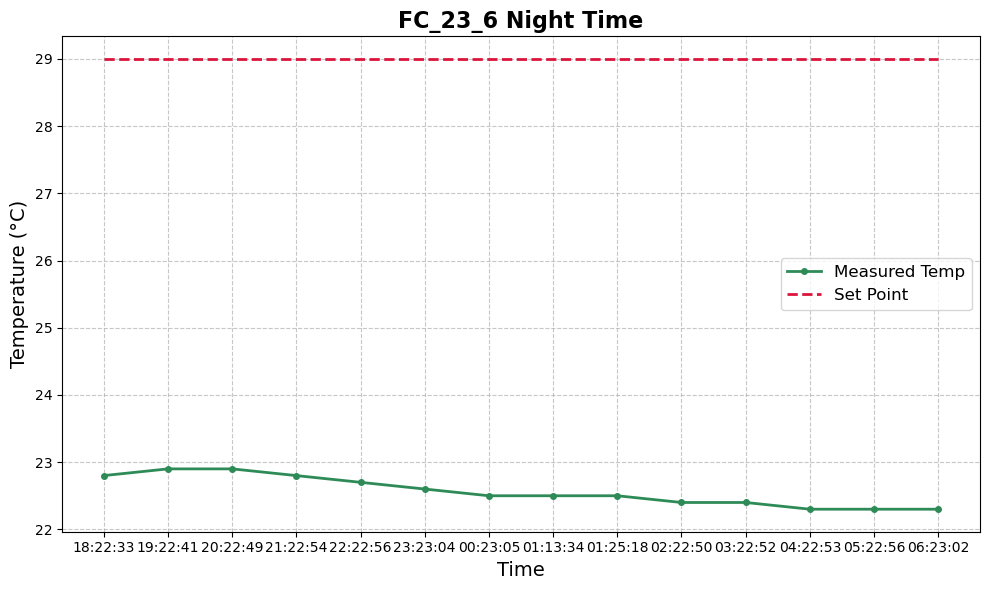

In [12]:
set_points1_night = df_device1_night[df_device1_night["field"] == "effective_cooling_zone_air_temperature_setpoint"]
y_set = np.array(set_points1_night["value"]).astype(float)
x_set = np.arange(y_set.size)

temps1_night = df_device1_night[df_device1_night["field"] == "zone_air_temperature_sensor"]
y_temp = np.array(temps1_night["value"]).astype(float)
x_temp = np.arange(y_temp.size)
x = extract_time_str(temps1_night["date_time_local"])

plt.figure(figsize=(10,6))  # bigger, clearer figure

# Plot measured temps
plt.plot(x, y_temp, 
         color='seagreen', linewidth=2, marker='o', markersize=4, 
         label="Measured Temp")

# Plot set point
plt.plot(x, np.ones(x_temp.size)*29, 
         color="crimson", linewidth=2, linestyle="--", 
         label="Set Point")

# Titles and labels
plt.title("FC_23_6 Night Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=12, loc="best")

# Tighter layout
plt.tight_layout()
plt.show()

In [13]:
### Making day dataframe
df_device1_day = df_device1.iloc[48:80]
#df_device1_day

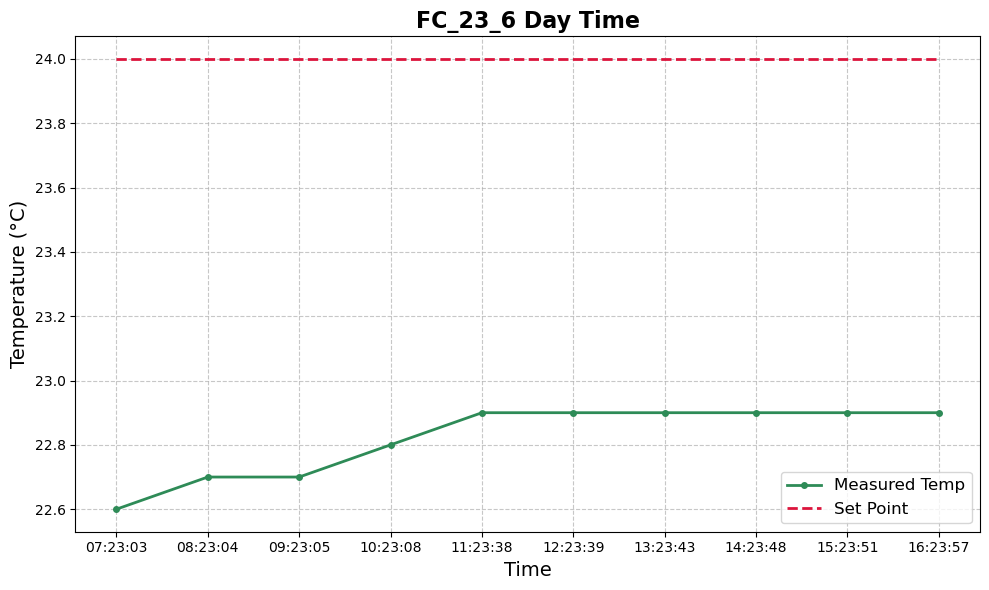

In [14]:
set_points1_day = df_device1_day[df_device1_day["field"] == "effective_cooling_zone_air_temperature_setpoint"]
y_set = np.array(set_points1_day["value"]).astype(float)
x_set = np.arange(y_set.size)

temps1_day = df_device1_day[df_device1_day["field"] == "zone_air_temperature_sensor"]
y_temp = np.array(temps1_day["value"]).astype(float)
x_temp = np.arange(y_temp.size)
x = extract_time_str(temps1_day["date_time_local"])

plt.figure(figsize=(10,6))  # bigger, clearer figure

# Plot measured temps
plt.plot(x, y_temp, 
         color='seagreen', linewidth=2, marker='o', markersize=4, 
         label="Measured Temp")

# Plot set point
plt.plot(x, np.ones(x_temp.size)*24, 
         color="crimson", linewidth=2, linestyle="--", 
         label="Set Point")

# Titles and labels
plt.title("FC_23_6 Day Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=12, loc="best")

# Tighter layout
plt.tight_layout()
plt.show()

In [28]:
df_device2 = df_ts[df_ts["device_name"] == sensors[2]].reset_index(drop=True)
df_device2_bool = df_device2[df_device2["kind"] == "Bool"]
df_device2_bool

,building_id,building_name,device_id,device_name,field,kind,date_time_local,value
1,60b517bd5f7ee717b4903f273,Building 1,60d4353ecba53c2e2165c125,FC_6_30,occupied_mode,Bool,2023-03-14 17:22:01.319,Occupied
3,60b517bd5f7ee717b4903f273,Building 1,60d4353ecba53c2e2165c125,FC_6_30,occupied_mode,Bool,2023-03-14 18:00:58.790,Unoccupied
6,60b517bd5f7ee717b4903f273,Building 1,60d4353ecba53c2e2165c125,FC_6_30,occupied_mode,Bool,2023-03-14 18:22:33.645,Unoccupied
9,60b517bd5f7ee717b4903f273,Building 1,60d4353ecba53c2e2165c125,FC_6_30,occupied_mode,Bool,2023-03-14 19:22:41.648,Unoccupied
12,60b517bd5f7ee717b4903f273,Building 1,60d4353ecba53c2e2165c125,FC_6_30,occupied_mode,Bool,2023-03-14 20:22:49.743,Unoccupied
14,60b517bd5f7ee717b4903f273,Building 1,60d4353ecba53c2e2165c125,FC_6_30,occupied_mode,Bool,2023-03-14 21:22:54.791,Unoccupied
18,60b517bd5f7ee717b4903f273,Building 1,60d4353ecba53c2e2165c125,FC_6_30,occupied_mode,Bool,2023-03-14 22:22:56.030,Unoccupied
21,60b517bd5f7ee717b4903f273,Building 1,60d4353ecba53c2e2165c125,FC_6_30,occupied_mode,Bool,2023-03-14 23:23:04.513,Unoccupied
24,60b517bd5f7ee717b4903f273,Building 1,60d4353ecba53c2e2165c125,FC_6_30,occupied_mode,Bool,2023-03-15 00:23:05.595,Unoccupied
27,60b517bd5f7ee717b4903f273,Building 1,60d4353ecba53c2e2165c125,FC_6_30,occupied_mode,Bool,2023-03-15 01:13:34.963,None


In [16]:
df_device2_night = df_device2.iloc[3:46].reset_index(drop=True)
df_device2_night.at[24, "value"] = "Unoccupied"   # Replace missing value with obvious gap
avg = (20.899999618530273+20.799999237060547) / 2
df_device2_night.at[23, "value"] = avg
df_device2_night.at[25, "value"] = 32.0
#df_device2_night

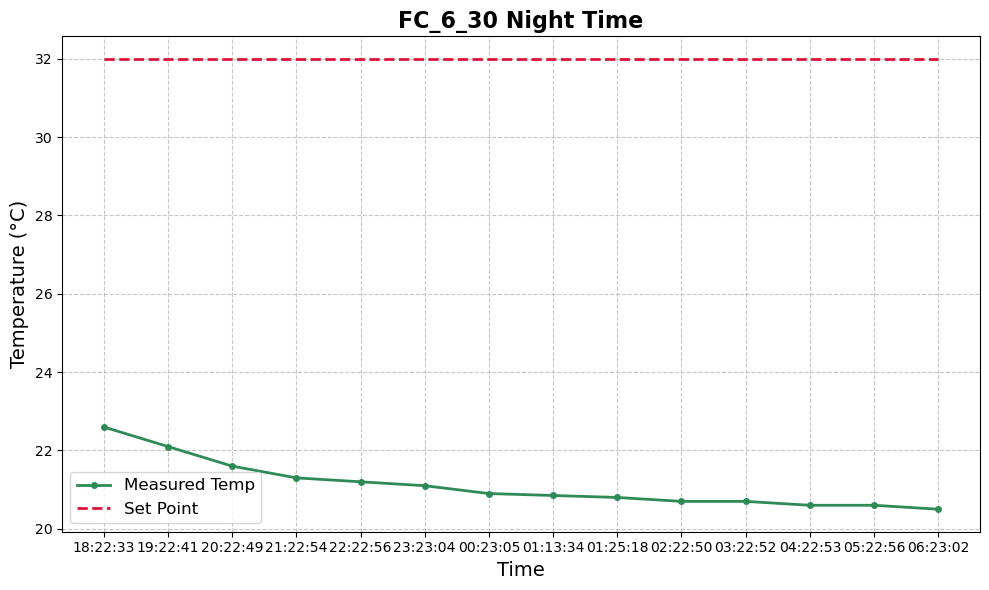

In [17]:
setpoint = 32.0
set_points2_night = df_device2_night[df_device2_night["field"] == "effective_cooling_zone_air_temperature_setpoint"]
y_set = np.array(set_points2_night["value"]).astype(float)
x_set = np.arange(y_set.size)

temps2_night = df_device2_night[df_device2_night["field"] == "zone_air_temperature_sensor"]
y_temp = np.array(temps2_night["value"]).astype(float)
x_temp = np.arange(y_temp.size)
x = extract_time_str(temps2_night["date_time_local"])

################################################
plt.figure(figsize=(10,6))  # bigger, clearer figure

# Plot measured temps
plt.plot(x, y_temp, 
         color='seagreen', linewidth=2, marker='o', markersize=4, 
         label="Measured Temp")

# Plot set point
plt.plot(x, np.ones(x_temp.size)*setpoint, 
         color="crimson", linewidth=2, linestyle="--", 
         label="Set Point")

# Titles and labels
plt.title("FC_6_30 Night Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=12, loc="best")

# Tighter layout
plt.tight_layout()
plt.show()

In [18]:
### Making day dataframe
df_device2_day = df_device2.iloc[51:82].reset_index(drop=True)
#df_device2_day

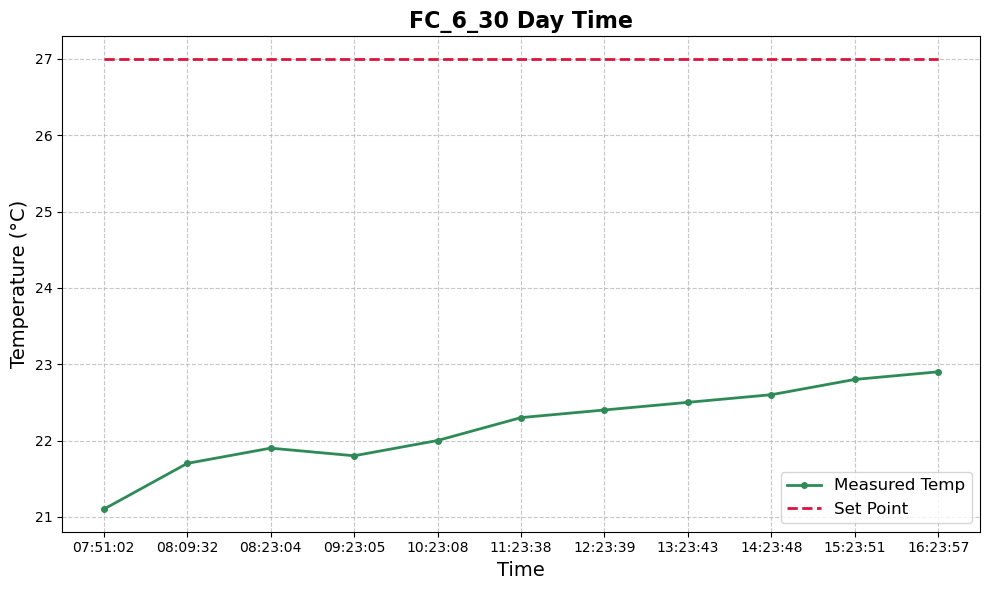

In [19]:
setpoint = 27.0
set_points2_day = df_device2_day[df_device2_day["field"] == "effective_cooling_zone_air_temperature_setpoint"]
y_set = np.array(set_points2_day["value"]).astype(float)
x_set = np.arange(y_set.size)

temps2_day = df_device2_day[df_device2_day["field"] == "zone_air_temperature_sensor"]
y_temp = np.array(temps2_day["value"]).astype(float)
x_temp = np.arange(y_temp.size)
x = extract_time_str(temps2_day["date_time_local"])

plt.figure(figsize=(10,6))  # bigger, clearer figure

# Plot measured temps
plt.plot(x, y_temp, 
         color='seagreen', linewidth=2, marker='o', markersize=4, 
         label="Measured Temp")

# Plot set point
plt.plot(x, np.ones(x_temp.size)*setpoint, 
         color="crimson", linewidth=2, linestyle="--", 
         label="Set Point")

# Titles and labels
plt.title("FC_6_30 Day Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=12, loc="best")

# Tighter layout
plt.tight_layout()
plt.show()

In [20]:
df_device3 = df_ts[df_ts["device_name"] == sensors[3]].reset_index(drop=True)
df_device3_bool = df_device3[df_device3["kind"] == "Bool"]
df_device3_bool

,building_id,building_name,device_id,device_name,field,kind,date_time_local,value
1,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,occupied_mode,Bool,2023-03-14 17:22:01.319,Occupied
4,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,occupied_mode,Bool,2023-03-14 17:59:58.855,Unoccupied
6,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,occupied_mode,Bool,2023-03-14 18:22:33.645,Unoccupied
9,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,occupied_mode,Bool,2023-03-14 19:22:41.648,Unoccupied
11,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,occupied_mode,Bool,2023-03-14 20:22:49.743,Unoccupied
14,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,occupied_mode,Bool,2023-03-14 21:22:54.791,Unoccupied
17,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,occupied_mode,Bool,2023-03-14 22:22:56.029,Unoccupied
21,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,occupied_mode,Bool,2023-03-14 23:23:04.513,Unoccupied
24,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,occupied_mode,Bool,2023-03-15 00:23:05.595,Unoccupied
27,60b517bd5f7ee717b4903f273,Building 1,630f2897fb585d74106441d3,FC_L_3_1,occupied_mode,Bool,2023-03-15 01:13:34.963,None


In [21]:
df_device3_night = df_device3.iloc[4:44].reset_index(drop=True)
df_device3_night.at[23, "value"] = "Unoccupied"   # Replace missing value with obvious gap
avg = (22.299999237060547+22.299999237060547) / 2
df_device3_night.at[22, "value"] = avg
df_device3_night.at[24, "value"] = 0.0
#df_device3_night

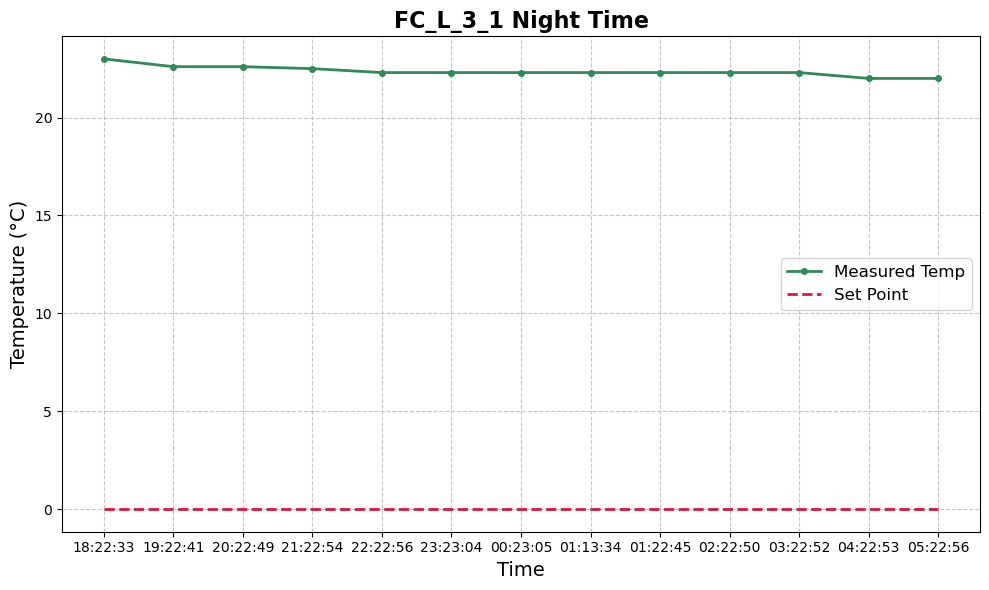

In [22]:
setpoint = 0.0
set_points3_night = df_device3_night[df_device3_night["field"] == "effective_cooling_zone_air_temperature_setpoint"]
y_set = np.array(set_points3_night["value"]).astype(float)
x_set = np.arange(y_set.size)

temps3_night = df_device3_night[df_device3_night["field"] == "zone_air_temperature_sensor"]
y_temp = np.array(temps3_night["value"]).astype(float)
x_temp = np.arange(y_temp.size)
x = extract_time_str(temps3_night["date_time_local"])

################################################
plt.figure(figsize=(10,6))  # bigger, clearer figure

# Plot measured temps
plt.plot(x, y_temp, 
         color='seagreen', linewidth=2, marker='o', markersize=4, 
         label="Measured Temp")

# Plot set point
plt.plot(x, np.ones(x_temp.size)*setpoint, 
         color="crimson", linewidth=2, linestyle="--", 
         label="Set Point")

# Titles and labels
plt.title("FC_L_3_1 Night Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=12, loc="best")

# Tighter layout
plt.tight_layout()
plt.show()

In [23]:
### Making day dataframe
df_device3_day = df_device3.iloc[44:79].reset_index(drop=True)
#df_device3_day

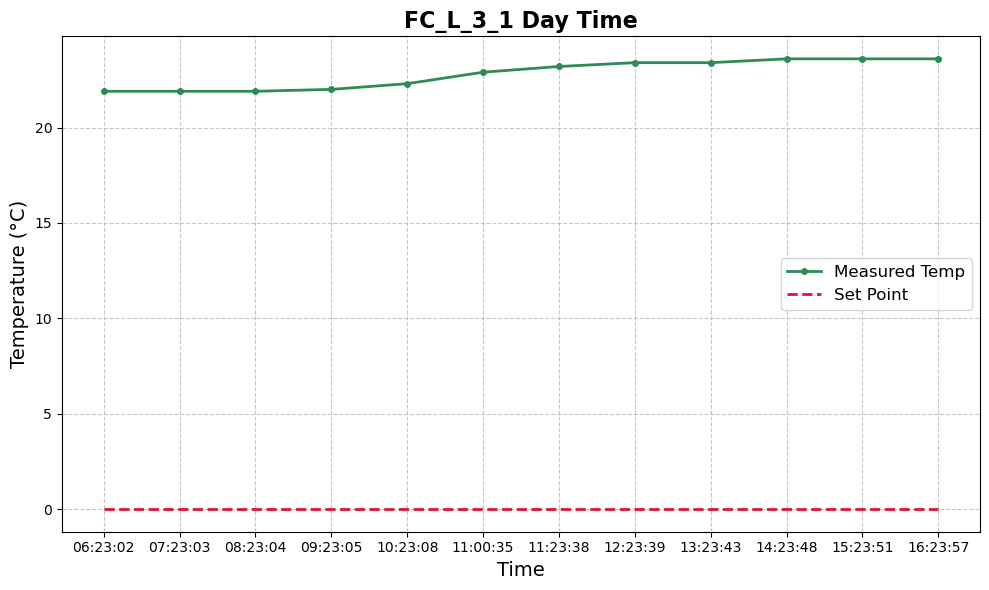

In [24]:
setpoint = 0.0
set_points3_day = df_device3_day[df_device3_day["field"] == "effective_cooling_zone_air_temperature_setpoint"]
y_set = np.array(set_points3_day["value"]).astype(float)
x_set = np.arange(y_set.size)

temps3_day = df_device3_day[df_device3_day["field"] == "zone_air_temperature_sensor"]
y_temp = np.array(temps3_day["value"]).astype(float)
x_temp = np.arange(y_temp.size)
x = extract_time_str(temps3_day["date_time_local"])

plt.figure(figsize=(10,6))  # bigger, clearer figure
##################################
# Plot measured temps
plt.plot(x, y_temp, 
         color='seagreen', linewidth=2, marker='o', markersize=4, 
         label="Measured Temp")

# Plot set point
plt.plot(x, np.ones(x_temp.size)*setpoint, 
         color="crimson", linewidth=2, linestyle="--", 
         label="Set Point")

# Titles and labels
plt.title("FC_L_3_1 Day Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=12, loc="best")

# Tighter layout
plt.tight_layout()
plt.show()

General Note: All missing values occured at the same time at 1:13. This might be due to system reset or perhaps an anomalous event. 